In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data prep

In [2]:
def import_data(filename, to_drop, rename_dict):
    '''function to import data, drop columns and remove duplicates
    args:
        filename (str): data to be imported
        to_drop (list): list of columns to be dropped
    returns:
        dataframe
    '''
    
    # read data
    data = pd.read_csv(filename, index_col=0)
    print('raw data \t:', data.shape, 'rows, cols')
    
    # select germany only
    data = data[data['Country'] == 'Germany']
    
    # drop columns
    data = data.drop(columns = dropped_col)
    
    # drop duplicates
    data = data.drop_duplicates()
    print('data after dropped \t:', data.shape, 'rows, cols')
    
    # rename columns
    data = data.rename(rename_dict, axis=1)

    # fix neighborhood
    data['neighborhood'] = data['neighborhood'].replace({'NeukÃ¶lln':'Neukoelln', 
                                    'Tempelhof - SchÃ¶neberg':'Tempelhof - Schoeneberg',
                                    'Treptow - KÃ¶penick':'Treptow - Koepenick'})

    # fix area
    data['area'] = round(data['area'].replace({0:np.nan})*0.092903)

    # divide overall rating by 10
    data['r_overall'] = data['r_overall']/10

    
    return data

In [4]:
dropped_col = ['Review ID', 'review_date', 'Reviewer ID', 'Reviewer Name',
               'Comments', 'Listing ID', 'Listing URL', 'Listing Name', 
               'Host ID', 'Host URL', 'Host Name', 'Host Since', 'City', 'Postal Code',
               'Reviews', 'First Review', 'Last Review', 'neighbourhood', 'Property Type',
               'Host Response Time', 'Host Response Rate', 'Is Superhost',
               'Is Exact Location', 'Country', 'Country Code', 
               'Business Travel Ready', 'Property Type']

rename_dict = {'Neighborhood Group': 'neighborhood', 
        'Postal Code': 'plz', 
        'Latitude': 'lat', 
        'Longitude': 'lon',
        'Room Type': 'room_type', 
        'Accomodates': 'accomodates', 
        'Bathrooms': 'bathroom', 
        'Bedrooms': 'bedroom',
        'Beds': 'bed', 
        'Square Feet': 'area', 
        'Price': 'price', 
        'Guests Included': 'guest_incl', 
        'Min Nights': 'min_night',
        'Overall Rating': 'r_overall', 
        'Accuracy Rating': 'r_accuracy', 
        'Cleanliness Rating': 'r_clean',
        'Checkin Rating': 'r_checkin', 
        'Communication Rating': 'r_comm', 
        'Location Rating': 'r_loc',
        'Value Rating': 'r_val', 
        'Instant Bookable': 'instant_bookable'
        }

path = '../data/raw/'
data = import_data(path+'airbnb_berlin.csv', dropped_col, rename_dict)

/var/folders/zh/6tz72s157dsdk3fzz1x9rvfc0000gn/T/ipykernel_26966/2284008752.py:33: DtypeWarning: Columns (19,32) have mixed types.Specify dtype option on import or set low_memory=False.
  data = import_data(path+'airbnb_berlin.csv', dropped_col, rename_dict)


raw data 	: (456961, 46) rows, cols
data after dropped 	: (23545, 20) rows, cols


In [5]:
def data_correction(data):
    # set price to numeric
    data['price'] = data['price'].replace({',':''}, regex=True).apply(pd.to_numeric,1)

    # replace non-unicode-coded letters
    data['neighborhood'] = data['neighborhood'].replace({'NeukÃ¶lln':'Neukoelln', 
                            'Tempelhof - SchÃ¶neberg':'Tempelhof - Schoeneberg',
                            'Treptow - KÃ¶penick':'Treptow - Koepenick'})

    return data

In [6]:
data = data_correction(data)

In [7]:
data

,neighborhood,lat,lon,room_type,accomodates,bathroom,bedroom,bed,area,price,guest_incl,min_night,r_overall,r_accuracy,r_clean,r_checkin,r_comm,r_loc,r_val,instant_bookable
index,,,,,,,,,,,,,,,,,,,,
0,Neukoelln,52.49234,13.42994,Entire home/apt,4,1.0,2.0,2.0,NaN,60.0,1,1,10.0,8.0,10.0,6.0,10.0,10.0,10.0,f
1,Pankow,52.53292,13.41502,Entire home/apt,2,1.0,1.0,1.0,NaN,52.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,Mitte,52.52134,13.41866,Private room,2,1.0,1.0,1.0,NaN,35.0,1,1,9.2,9.0,8.0,9.0,10.0,10.0,9.0,f
22,Pankow,52.56552,13.41189,Entire home/apt,3,1.0,1.0,2.0,NaN,30.0,1,4,9.0,10.0,9.0,9.0,8.0,9.0,9.0,f
24,Friedrichshain-Kreuzberg,52.50585,13.38580,Private room,4,1.0,1.0,2.0,NaN,30.0,1,3,10.0,10.0,9.0,10.0,10.0,9.0,9.0,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456582,Treptow - Koepenick,52.45494,13.51423,Entire home/apt,6,1.0,2.0,2.0,NaN,50.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
456585,Lichtenberg,52.50099,13.49185,Private room,2,1.0,1.0,1.0,NaN,20.0,1,1,9.2,10.0,10.0,10.0,9.0,9.0,9.0,f
456605,Friedrichshain-Kreuzberg,52.50283,13.37799,Entire home/apt,4,1.0,1.0,3.0,NaN,60.0,2,1,9.8,10.0,10.0,10.0,10.0,10.0,10.0,t


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23545 entries, 0 to 456958
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   neighborhood      23545 non-null  object 
 1   lat               23545 non-null  float64
 2   lon               23545 non-null  float64
 3   room_type         23545 non-null  object 
 4   accomodates       23545 non-null  int64  
 5   bathroom          23516 non-null  float64
 6   bedroom           23525 non-null  float64
 7   bed               23510 non-null  float64
 8   area              313 non-null    float64
 9   price             23545 non-null  float64
 10  guest_incl        23545 non-null  int64  
 11  min_night         23545 non-null  int64  
 12  r_overall         18924 non-null  float64
 13  r_accuracy        18898 non-null  float64
 14  r_clean           18902 non-null  float64
 15  r_checkin         18880 non-null  float64
 16  r_comm            18896 non-null  float

# EDA

## neighborhood/bezirk

### neighborhood/price

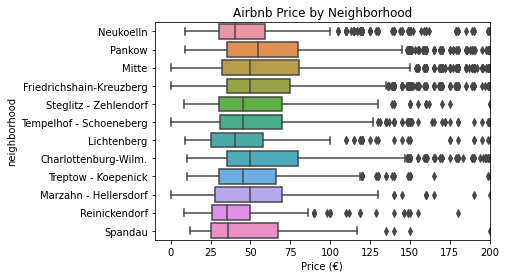

In [9]:
plt.title('Airbnb Price by Neighborhood')
sns.boxplot(data=data, y='neighborhood', x='price')
plt.xlabel('Price (€)')
#plt.xticks(rotation=90)
plt.xlim([-10, 200])
plt.show()

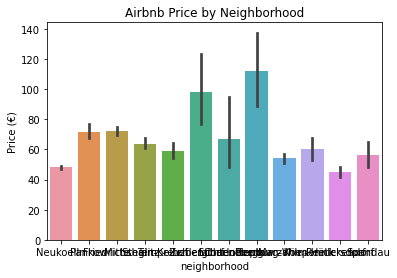

In [99]:
plt.title('Airbnb Price by Neighborhood')
sns.barplot(data=data, x='neighborhood', y='price')
plt.ylabel('Price (€)')
#plt.xticks(rotation=90)
#plt.xlim([-10, 200])
plt.show()

### neighborhood/area

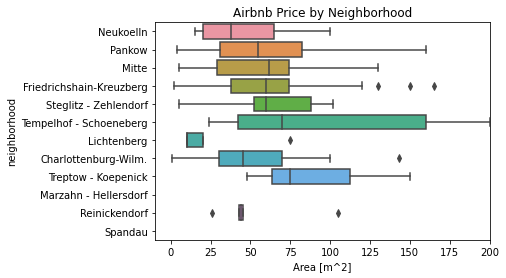

In [69]:
plt.title('Airbnb Price by Neighborhood')
sns.boxplot(data=data, y='neighborhood', x='area')
plt.xlabel('Area [m^2]')
#plt.xticks(rotation=90)
plt.xlim([-10, 200])
plt.show()

### neighborhood/r_overall

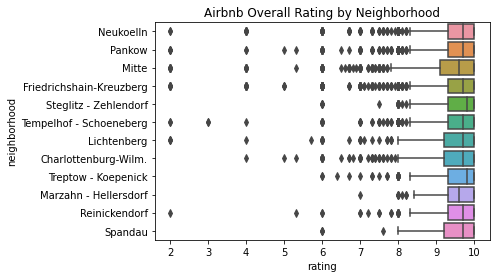

In [70]:
plt.title('Airbnb Overall Rating by Neighborhood')
sns.boxplot(data=data, y='neighborhood', x='r_overall')
plt.xlabel('rating')
#plt.xticks(rotation=90)
#plt.xlim([-10, 200])
plt.show()

## room type

### price/room type

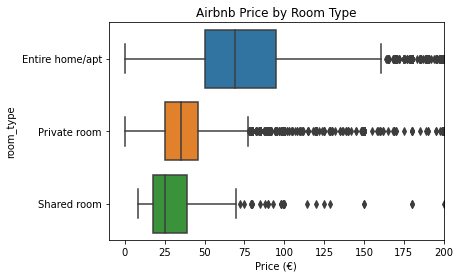

In [12]:
plt.title('Airbnb Price by Room Type')
sns.boxplot(data=data, y='room_type', x='price')
plt.xlabel('Price (€)')
#plt.xticks(rotation=90)
plt.xlim([-10, 200])
plt.show()

## price distribution

In [94]:
data.describe()

,lat,lon,accomodates,bathroom,bedroom,bed,area,price,guest_incl,min_night,r_overall,r_accuracy,r_clean,r_checkin,r_comm,r_loc,r_val
count,23545.000000,23545.000000,23545.000000,23516.000000,23525.000000,23510.000000,313.000000,23545.000000,23545.000000,23545.000000,18924.000000,18898.000000,18902.000000,18880.000000,18896.000000,18881.000000,18878.000000
mean,52.509913,13.406184,2.671820,1.095998,1.161743,1.641855,61.536741,69.610278,1.346231,6.901210,9.456410,9.679966,9.335044,9.728919,9.746560,9.550395,9.417629
std,0.031277,0.058567,1.567774,0.346148,0.660596,1.228541,46.221520,216.619557,0.856198,24.877587,0.759862,0.737652,1.031055,0.695136,0.679464,0.748597,0.840309
min,52.345800,13.097180,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,52.489190,13.375720,2.000000,1.000000,1.000000,1.000000,32.000000,32.000000,1.000000,2.000000,9.200000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,52.509220,13.416550,2.000000,1.000000,1.000000,1.000000,55.000000,49.000000,1.000000,3.000000,9.700000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,52.532670,13.439520,3.000000,1.000000,1.000000,2.000000,75.000000,75.000000,1.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,52.651670,13.757640,16.000000,8.500000,10.000000,22.000000,431.000000,9000.000000,16.000000,1000.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


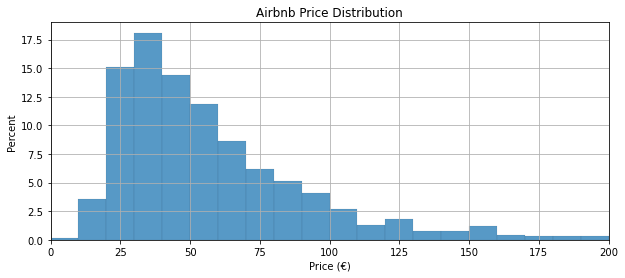

In [97]:
fig = plt.figure(figsize=(10,4))
plt.title('Airbnb Price Distribution')
sns.histplot(data=data, x='price', binwidth=10, stat='percent')
plt.xlabel('Price (€)')
#plt.xticks(rotation=90)
plt.xlim([0, 200])
#plt.ylim([0, 50])
#plt.axvline(data.price.median(), color='red')
#plt.axvline(data.price.mean(), color='blue')
plt.grid()
plt.show()

## accomodates

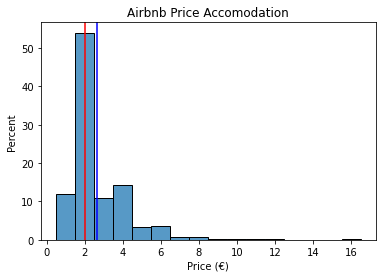

In [67]:
plt.title('Airbnb Price Accomodation')
sns.histplot(data=data, x='accomodates', discrete=True, stat='percent')
plt.xlabel('Price (€)')
#plt.xticks(rotation=90)
#plt.xlim([0, 400])
plt.axvline(data.accomodates.median(), color='red')
plt.axvline(data.accomodates.mean(), color='blue')
plt.show()

In [ ]:
r_overall         18924 non-null  float64
 13  r_accuracy        18898 non-null  float64
 14  r_clean           18902 non-null  float64
 15  r_checkin         18880 non-null  float64
 16  r_comm            18896 non-null  float64
 17  r_loc             18881 non-null  float64
 18  r_val   

In [39]:
rating = ['r_accuracy', 'r_clean', 'r_checkin', 'r_comm', 'r_loc', 'r_val', 'r_overall']

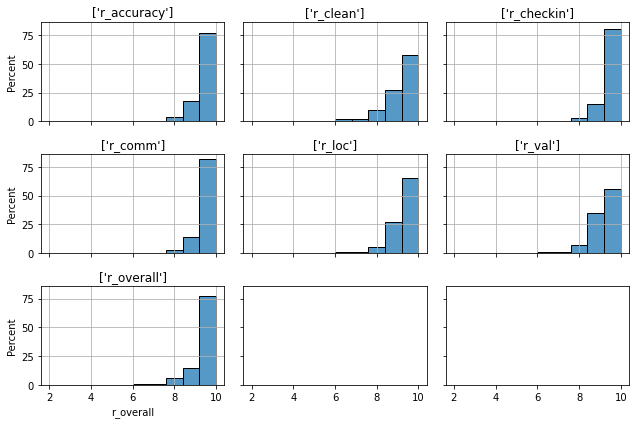

In [54]:
rating = ['r_accuracy', 'r_clean', 'r_checkin', 'r_comm', 'r_loc', 'r_val', 'r_overall']

total_column = 3
total_row = 3

fig, ax = plt.subplots(nrows=total_row, ncols=total_column, sharey=True, sharex=True, figsize=(9, 6))
for i, j in enumerate(rating):
    row = i // total_column
    col = i % total_column
    ax[row][col].set_title([j])
    ax[row][col].grid()
    sns.histplot(data, x = j, ax=ax[row][col], stat='percent', bins=10)
    
    
plt.tight_layout()
plt.show()
    

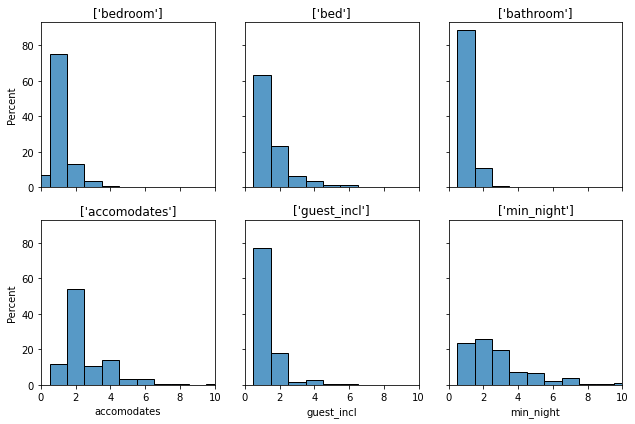

In [64]:
house_prop = ['bedroom', 'bed', 'bathroom', 'accomodates', 'guest_incl', 'min_night']

total_column = 3
total_row = 2

fig, ax = plt.subplots(nrows=total_row, ncols=total_column, sharey=True, sharex=True, figsize=(9, 6))
for i, j in enumerate(house_prop):
    row = i // total_column
    col = i % total_column
    ax[row][col].set_title([j])
    #ax[row][col].grid()
    sns.histplot(data, x = j, ax=ax[row][col], discrete=True, stat='percent')
    ax[row][col].set_xlim([0, 10])
    
    
plt.tight_layout()
plt.show()

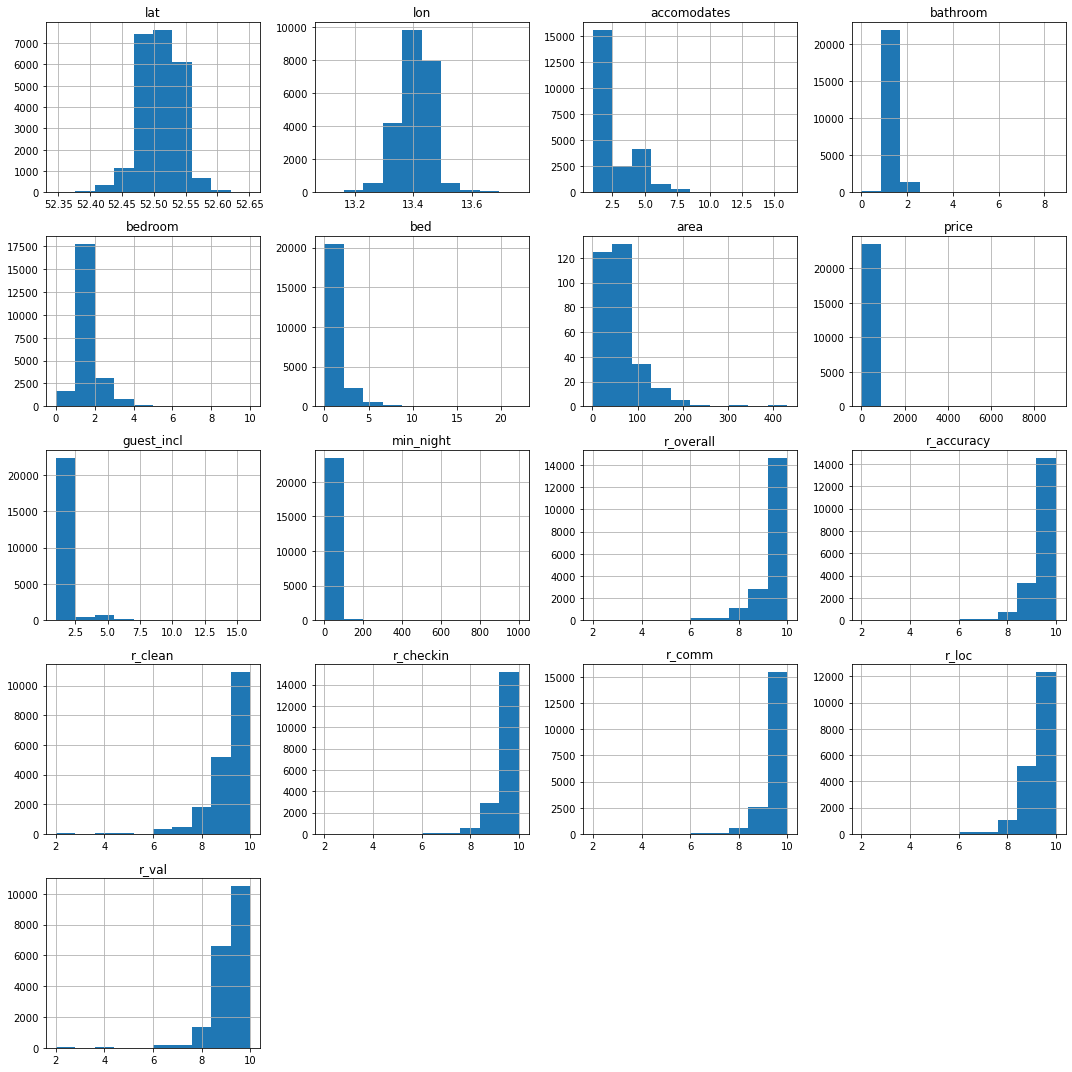

In [108]:
data.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()